# Perfect Your Steakhouse!

## 1. Introduction

Steak is one of the favourite food enjoyed by people in the U.S. But how to operate a popular steakhouse is a big problem. How to improve the steak taste and what is the weakness of thier steakhouse must be a biggest concern for the steakhouse owners.
Our project aims at using the Yelp-provided dataset to establish a comprehensive and improved rating system, in order to provide suggestions for steakhouse owners. The system will abstract the information both from the constumers' reviews and the attributes of the steakhouses to show the steakhouse's ability in five specific aspects-- Food, Price, Service, Drink, Time. 

## 2. Data

### 2.1 Data Introduction
Raw data from Yelp(total 8.22GB) conatins four parts--business, review, tip, user. In our project, we will only use the steakhouse related data(whose categories feature involves steakhouse), which contains 1603 steakhouses and totally 243536 reviews from the steakhouses.

### 2.2 Data Preprocessing

### 2.2.1 Reviews:
For the reviews, we use the package *nltk* to split the whole review sentence into the individual words. 

The first step, we will tokenize the reviews. 

- For example: *"I like the bread!"* ->*"I","like","the","bread","!"*

To improve the performence of our system, we deleted the meaningless words in the reviews. These words are very commonly used in the english grammer, which may only to structure the sentence or to link the nones. The detailed types of words deleted are listed below:
1. Stop words, or we can call them common words, like "a"，"the"，"or". 
2. Substitutes, like "you", "he", "them".
3. Non-alphabetic characters: "!", ",", ".", "%".

To finalize and unify the words, we also recover the words back to their primitive form.

- For example: "ate" -> "eat", "loving" -> "love".

#### Sample:
- **Raw review**: The food was very good . The waitress was very inventive . The only thing is my I felt so sick after eating it . I'm not sure if it's just my stomach not being able to handle it or what but I felt terrible . The staff at the front was very friendly and talkative.
- **Proccessed review**: 'food', 'good', 'waitress', 'inventive', 'thing', 'felt', 'sick', 'eat', 'sure', 'stomach', 'able', 'handle', 'felt', 'terrible', 'staff', 'front', 'friendly', 'talkative'.

### 2.2.2 Business:
For the business data set, we use the attributes of each business. There are 30 attributes in total but some of them has more than 2/3 missing values.The numbers of values bar chart graphy of attributes is showed as follows.From the plot, we realize there is a huge gap from RestaurantTableService to after. So we pick up attributes behind RestaurantTableSerive as common attributes to conduct further research.

<img src="plot.png" width="800">



We regard 18 attributes including  'GoodForMeal',
       'BusinessAcceptsCreditCards', 'Caters', 'BikeParking', 'WiFi',
       'NoiseLevel', 'Ambience', 'HasTV', 'Alcohol', 'BusinessParking',
       'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsAttire',
       'RestaurantsDelivery', 'RestaurantsReservations', 'GoodForKids',
   'RestaurantsPriceRange2', 'RestaurantsGoodForGroups'
       'RestaurantsPriceRange2', 'RestaurantsGoodForGroups' as our target attributes to fill out missing values.We fill out the categorical missing value with mode of remaining data while the numerical missing values with mean of remaining data. 

## 3. Rating System based on Reviews
### 3.1 The selection of the Index
In this section, we should figure out the things that customers care about for a steakhouses. In other words, we need to find out the keywords that significantly effect the stars in reviews. We select five categories words: food, service, cost performance, waiting time and drink. Each category contains several relative words. For these words, we try to separate the reviews to two parts. One part has more positive words than negtives description while another part of reviews have more negative words. For these two parts of reviews, we count the the number of high stars review(four and five stars) and low stars reviews(one and two stars). The we make ki-square test to find out whether the ratio of high stars reviews between low stars reviews has difference in these two group. If the difference is significant, we can say these categories of words are important for customers to give stars for steakhouses.

<img src="111.png" style="max-width:100%">

### 3.2 Adaptive rating system
For every business ID, we rank the five kinds of words by the ratio of positive words between negative words, then the first keyword get this review stars; the second keyword get the reviews rank minus 0.5. Same to the third , forth and fifth. Then we compute the average stars for each categories of keywords. The we can get average stars in these five aspects for every steakhouse.

<img src="22.png" style="max-width:100%">

## 4. Suggetions from the attributes
In order to find which attributes matter most,we conduct decesion tree and restrict the depth of tree with 4,minimum number of samples required to split an internal node with 50  and the minimum number of samples required to be at a leaf node with 50. Avoiding the imbanlanced lables, the steakhouse is divided manually  into 3 classes, class C with stars from 4 to 5, class B with stars of 3, class A with stars from 1 to 3. With the tree result as follows, we pick up the attributes most matter for stars rating to give suggestion.

<img src="tree(3).png" style="max-width:100%">


From the plot we find the attributes 'Ambience' mostly divide up three classes and 
ambience witout 'trendy' has more chance to have a better score. That may because high-scroe steakhouses are usually with 'upscale' or 'classy' ambience while steakhouses with 'trendy' ambience are usually get an average rating. Further more, restaurants with 'catering' and without 'TV' tends to have a high score. That is reasonable since catering is essential for a classy steakhouse and television may distract customers from talking with each other and make noise.

## 5. Conclusion and Suggestion

Shiny-webpage is form of our final results.

In our webpage, we offer several useful information.

1. Map: with different inputs, the map will change automatically.
2. Stars Distribution: Like map, the distribution will change automatically. For example, if all inputs are 'All', it will show the distribution of stars for all steakhouses.
3. Radar of reviews: After choosing a name of steakhouse, a radar plot will show for this steakhouse. From the following plot, it shows that for this steakhouse, the drink dimension is perfect. For food, service, time are good. For price, it is not good and we suggest this store to improve this part first.

<img src="tree(3).png" style="max-width:80%">

4. Suggestions from attributes: After selecting the name of steakhouse, it will show the suggestions for this one.
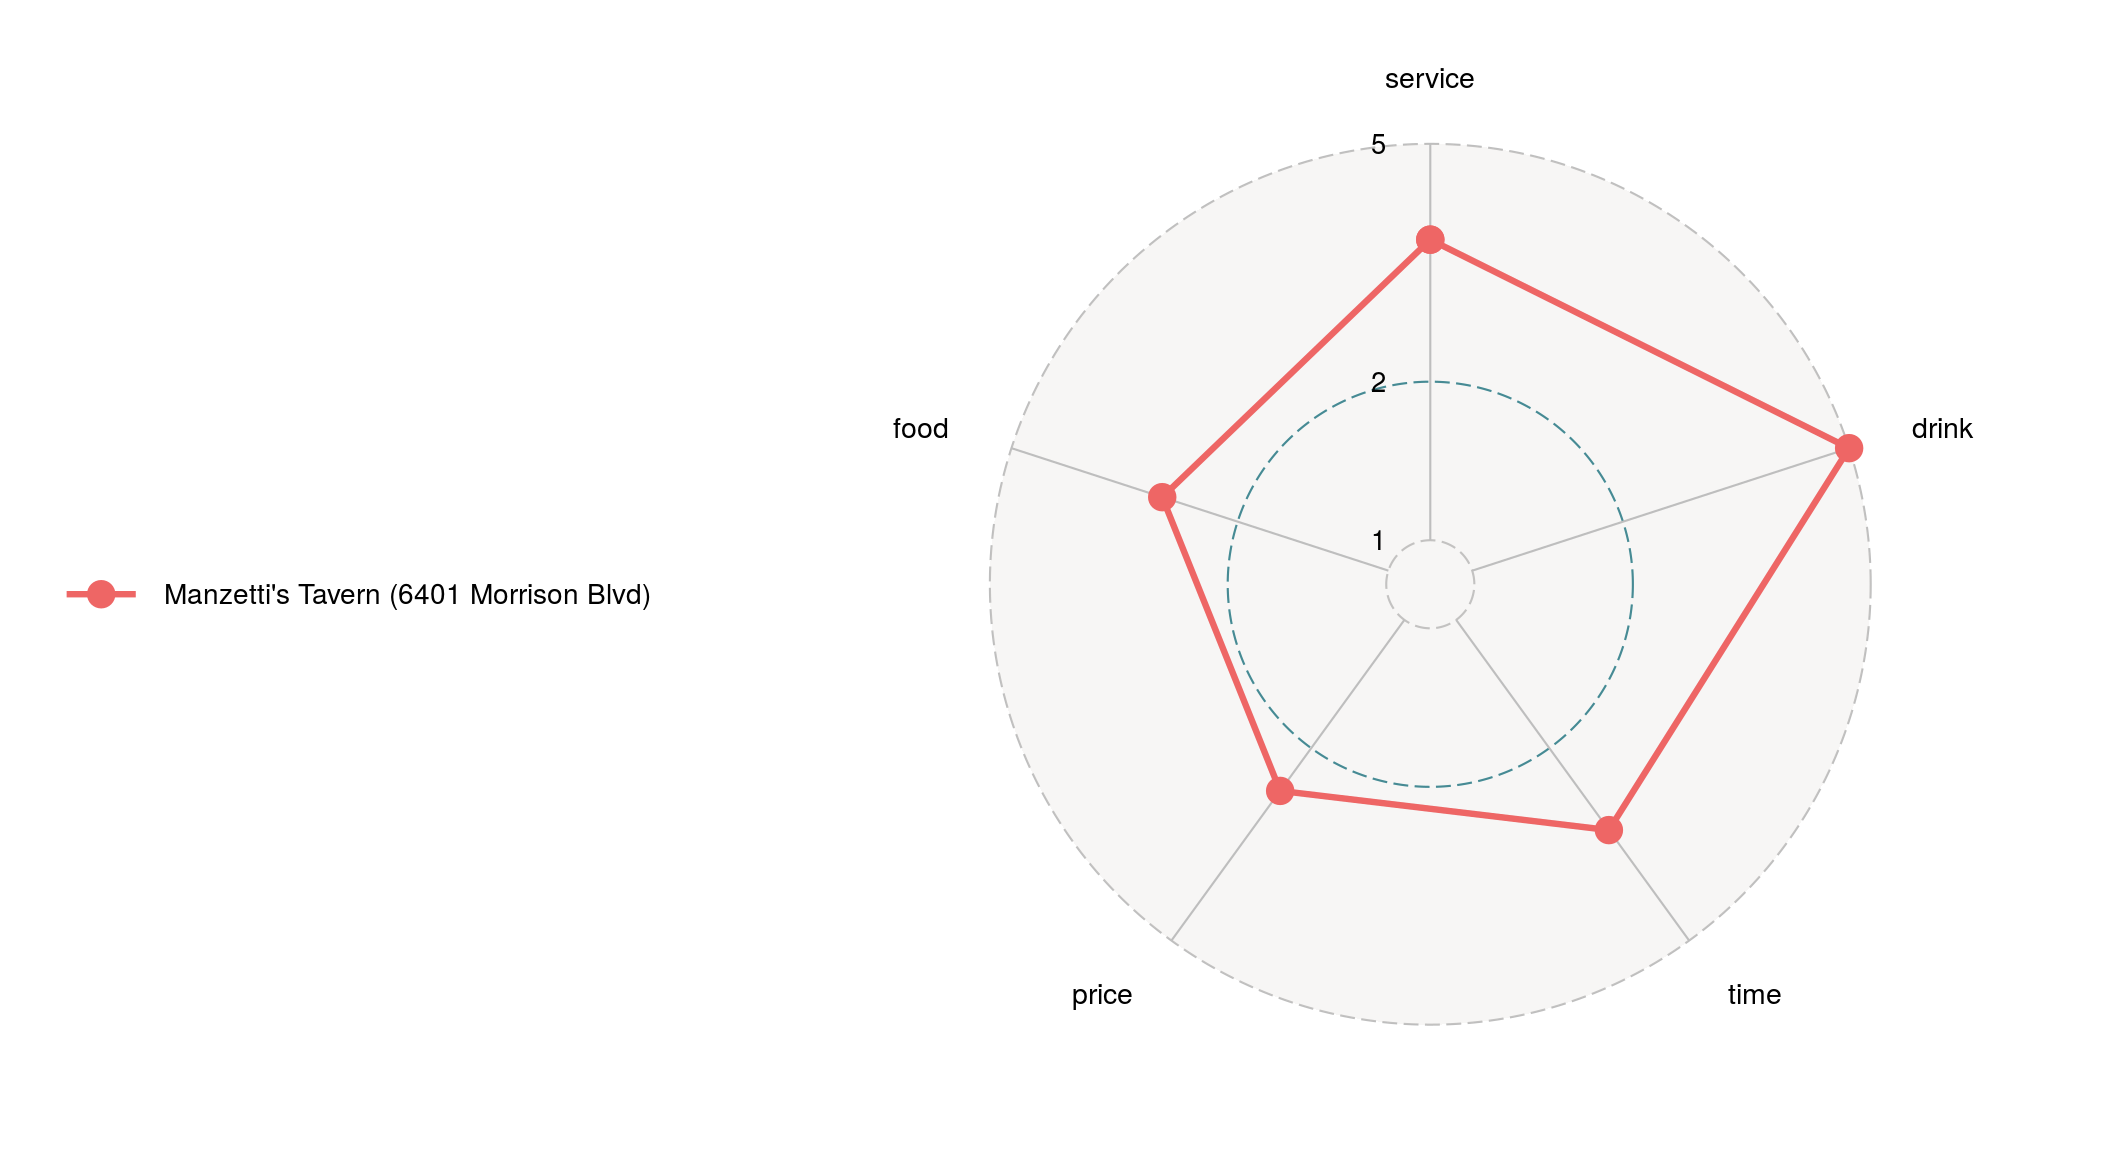

## 6. Strength and Weakness

### Strength: 
1. Compared with the plain text comment provided by the Yelp, our system's power plot make it more direct and simple for both the steakhouse owners and potential costumers to know the strength and weakness of the steakhouses. 
2. The rating system can reduce the bias produced by the two-faced reviews(contain both compliment and criticism) via adding the punishment to the final rates according to the ratio of the positive and negative words around the key words.

### Weakness:
1. Our results depend on the number of the reviews for each steakhouse. For those steakhouses who has few reviews, our system will show some biases.
2. It is hard to interpret tree method outcome objectively, which contains some subjective factors. 
3. It would be better if we can split all steakhouses into two parts: high-end group and cheap group.

## 7. Contribution
- Jiawei Wu: Clean "review" data, Conclusion and Suggestion, Shiny app.
- Yansong Mao: Clean "Business" data, Suggestions based on attributes.
- Zhoujingpeng Wei: Rating System based on Reviews, Wordcloud plots.
- Zheng Ni: Introduction, Geoplots, Geographical factors, Strength and weakness.

## 8. Reference
- http://www.nltk.org/book/